# Text Classification Using Naive Bayes

### 1) Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import nltk
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize , word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk import NaiveBayesClassifier
from nltk.corpus import wordnet
import random
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### 2) Put the Path of Dataset Present on your Computer

In [2]:
Path = "C:/Users/User/Project---Text-Classification/datasets"

### 3) Loading Data from Dataset

In [3]:
print(len(os.listdir(Path)))
os.listdir(Path)

20


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
X = []
Y = []
for category in os.listdir(Path):
    for document in os.listdir(Path + '/' + category):
        with open(Path + '/' + category + '/' + document, "r") as file:
#             X.append(document, file.read())) ## name && text of the document of certain folder
            X.append(file.read())
            Y.append(category)                  ## folder name in which that document present

In [5]:
print(Y[5])      ## Folder Name name in which this document is present 
# print(X[5][0]) ## document name
# print(X[5][1]) ## Text Present in this document
print(X[5])

alt.atheism
Newsgroups: alt.atheism
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!usc!sdd.hp.com!nigel.msen.com!yale.edu!ira.uka.de!news.dfn.de!tubsibr!dbstu1.rz.tu-bs.de!I3150101
From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau)
Subject: Re: A visit from the Jehovah's Witnesses
Message-ID: <16BA711EF4.I3150101@dbstu1.rz.tu-bs.de>
Sender: postnntp@ibr.cs.tu-bs.de (Mr. Nntp Inews Entry)
Organization: Technical University Braunschweig, Germany
References: <bskendigC4KD1z.CDC@netcom.com> <1p8v1aINN9e9@matt.ksu.ksu.edu>  <16BA5DA01.I3150101@dbstu1.rz.tu-bs.de> <1993Apr5.091139.823@batman.bmd.trw.com>
Date: Mon, 5 Apr 1993 19:24:19 GMT
Lines: 114

In article <1993Apr5.091139.823@batman.bmd.trw.com>
jbrown@batman.bmd.trw.com writes:
 
>> Didn't you say Lucifer was created with a perfect nature?
>
>Yes.
>
 
Define perfect then.
 
 
>> I think you
>> are playing the usual game here, make sweeping statements like omni-,


In [6]:
print(len(X))

19997


### 4) Tokenize Everything

In [7]:
## Tokenize everything
## Word tokenizer was Giving less accuracy
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[a-z0-9]+')

for i in range(len(X)):
    X[i] = tokenizer.tokenize(X[i])

In [8]:
print(len(X[5]))
print(X[5])

950
['ewsgroups', 'alt', 'atheism', 'ath', 'cantaloupe', 'srv', 'cs', 'cmu', 'edu', 'crabapple', 'srv', 'cs', 'cmu', 'edu', 'fs7', 'ece', 'cmu', 'edu', 'europa', 'eng', 'gtefsd', 'com', 'howland', 'reston', 'ans', 'net', 'usc', 'sdd', 'hp', 'com', 'nigel', 'msen', 'com', 'yale', 'edu', 'ira', 'uka', 'de', 'news', 'dfn', 'de', 'tubsibr', 'dbstu1', 'rz', 'tu', 'bs', 'de', '3150101', 'rom', '3150101', 'dbstu1', 'rz', 'tu', 'bs', 'de', 'enedikt', 'osenau', 'ubject', 'e', 'visit', 'from', 'the', 'ehovah', 's', 'itnesses', 'essage', '16', '711', '4', '3150101', 'dbstu1', 'rz', 'tu', 'bs', 'de', 'ender', 'postnntp', 'ibr', 'cs', 'tu', 'bs', 'de', 'r', 'ntp', 'news', 'ntry', 'rganization', 'echnical', 'niversity', 'raunschweig', 'ermany', 'eferences', 'bskendig', '4', '1z', 'netcom', 'com', '1p8v1a', '9e9', 'matt', 'ksu', 'ksu', 'edu', '16', '5', '01', '3150101', 'dbstu1', 'rz', 'tu', 'bs', 'de', '1993', 'pr5', '091139', '823', 'batman', 'bmd', 'trw', 'com', 'ate', 'on', '5', 'pr', '1993', '19

### 5) Remove Stop Words

In [9]:
## add punctuations in stop list to get rid off, from them as well
## all the stopwords are in lower case
stop = stopwords.words("english")
punctuations = list(string.punctuation)
stop += punctuations
print(stop)


## Remove stop words 
def remove_stop_words(X):
    for i in range(len(X)):
        output = []
        for doc in X[i]:
            if not (doc.lower().isalpha()) or len(doc) <= 2:
                continue
            if doc.lower() not in stop:
                output.append(doc)
        X[i] = output
    return X


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
X = remove_stop_words(X)

### 6) Do Stemming

In [11]:
## Lemmatizer was taking to much time ..... thats why we are doing stemming
## Stemming
# ps = PorterStemmer()
## PorterStemmer was Giving less accuracy
from nltk.stem.snowball import SnowballStemmer
ps = SnowballStemmer("english")
for i in range(len(X)):
    for j in range(len(X[i])):
        X[i][j] = ps.stem(X[i][j])

### 7) Split data into training and testing dataset

In [12]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y)

In [13]:
len(x_train), len(y_train), len(x_test), len(y_test)

(14997, 14997, 5000, 5000)

### 8) Create Feature Set

In [14]:
all_words = {}
for document in x_train:
    for word in document:
        if word not in all_words:
            all_words[word] = 1
        else :
            all_words[word] += 1

In [15]:
type(all_words)
len(all_words)
all_words["gate"] ## One of the word of the dic

182

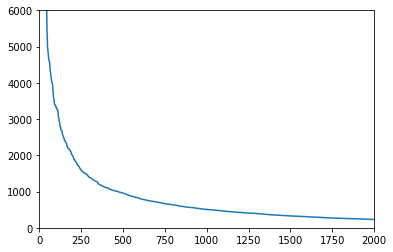

In [16]:
import operator
all_words = sorted(all_words.items(), key = operator.itemgetter(1), reverse = True)
x = []
y = []
for i in range(len(all_words)):
    x.append(i)
    y.append(all_words[i][1])
plt.plot(x, y)
plt.axis([0, 2000, 0, 6000])
plt.show()

In [17]:
## Pick the First 2000 words
features = {} ### (feature, index)
for i in range(2000):
    features[all_words[i][0]] = i
len(features), type(features)

(2000, dict)

### 9) Convert Training and Testing Data into the format which Naive Bayes takes

In [18]:
def get_required_format(x, features):
    N = len(x)
    M = len(features)
    output = np.array([[0 for j in range(M)] for i in range(N)])
    
    for i in range(N):
        doc = x[i]
        for word in doc:
            if word in features:
                output[i][features[word]] += 1
    return output

In [19]:
type(x_train), len(x_train)

(list, 14997)

In [20]:
x_train = get_required_format(x_train, features)
x_test = get_required_format(x_test, features)
x_train, x_test

(array([[ 5,  4,  4, ...,  0,  0,  0],
        [ 5,  1,  0, ...,  0,  0,  0],
        [ 8,  4,  1, ...,  0,  0,  0],
        ...,
        [ 7,  4,  1, ...,  0,  0,  0],
        [12,  5,  1, ...,  0,  0,  0],
        [ 8,  4,  1, ...,  0,  0,  0]]),
 array([[ 5,  4,  9, ...,  0,  0,  0],
        [ 4,  1,  1, ...,  0,  0,  0],
        [ 7,  3,  1, ...,  0,  0,  0],
        ...,
        [ 6,  1,  0, ...,  0,  0,  0],
        [14,  4,  5, ...,  0,  0,  0],
        [11,  1,  0, ...,  0,  0,  0]]))

In [21]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [22]:
type(x_train), len(x_train)

(numpy.ndarray, 14997)

In [23]:
x_train.shape, len(y_train)

((14997, 2000), 14997)

In [24]:
x_train.mean(axis = 0)

array([7.78562379, 2.60372074, 2.27578849, ..., 0.01540308, 0.01540308,
       0.0153364 ])

### 10) Inbuilt Sklearn Naive Bayes

In [25]:
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
print("Score on Training Data!!!!!")
clf.score(x_train, y_train)

Score on Training Data!!!!!


0.8895779155831166

In [27]:
print("Score on Testing Data!!!!!")
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

Score on Testing Data!!!!!


0.859

In [28]:
## Printing Classification Report
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.75      0.76      0.76       242
           comp.graphics       0.90      0.73      0.80       261
 comp.os.ms-windows.misc       0.73      0.89      0.81       270
comp.sys.ibm.pc.hardware       0.76      0.88      0.81       232
   comp.sys.mac.hardware       0.86      0.90      0.88       268
          comp.windows.x       0.92      0.69      0.79       260
            misc.forsale       0.76      0.95      0.84       255
               rec.autos       0.88      0.89      0.88       231
         rec.motorcycles       0.90      0.94      0.92       239
      rec.sport.baseball       0.97      0.94      0.95       231
        rec.sport.hockey       0.94      0.96      0.95       258
               sci.crypt       0.98      0.95      0.97       236
         sci.electronics       0.87      0.88      0.87       270
                 sci.med       0.95      0.90      0.93       247
         

In [29]:
## Printing Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[185   0   0   0   1   0   3   1   3   0   1   1   0   2   0   2   0   3
    1  39]
 [  0 190  20  19  11   8   9   2   0   0   0   0   1   0   1   0   0   0
    0   0]
 [  0   2 241  13   1   6   5   0   0   0   0   0   1   1   0   0   0   0
    0   0]
 [  0   1   6 203  15   1   2   0   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   1   2  14 242   0   6   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   8  56   8   4 180   1   0   0   0   0   0   2   1   0   0   0   0
    0   0]
 [  0   0   0   2   1   0 241   6   0   0   1   0   3   0   1   0   0   0
    0   0]
 [  0   0   0   0   1   0  10 206   9   0   1   0   4   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0  10   3 225   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   1   1 217   8   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   2   6 247   0   0   0   1   0   0   0
    1   0]
 [  0   0   1   1   0   1   0   0   0   0   0 225   5   1   0   0

### 11) Self Implemented Naive Bayes

In [38]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset, y_train):
    count = {}
    total_word = 0
    y_train = np.array(y_train)
    count["total_doc"] = len(y_train)
    classes = set(y_train)
    for i in classes:
        temp = 0
        x_train_with_i = x_train_dataset[y_train == i]
        temp2 = x_train_with_i.shape[0]
        count[i] = {}
        
        for feature in features:
            l = (x_train_with_i[ : , features[feature]]).sum()
            count[i][feature] = l
            temp += l
            
        count[i]["word_in_class"] = temp
        count[i]["length"] = temp2
    return count

In [39]:
def probability(x_test, dic, classes):
    prob = np.log(dic[classes]["length"]) - np.log(dic["total_doc"])
    feature = list(dic[classes].keys())
    for j in range (len(feature) - 2):
        xj = x_test[j]
        if xj == 0:
            current_prob=0
        else:
            num = dic[classes][feature[j]] + 1
            den = dic[classes]["word_in_class"] + len(dic[classes].keys()) - 2
            current_prob = np.log(num) - np.log(den)
        prob += current_prob
    return prob    

In [40]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run = True
    classes = dic.keys()
    for i in classes:
        if i == "total_doc":
            continue
        prob = probability(x_test, dic, i)
        if first_run or prob > best_prob:
            best_prob = prob
            first_run = False
            best_class = i
    return best_class

In [41]:
def predict_(x_test, dic):
    y_pred = []
    for x in x_test:
        y_pred.append(predict_for_single(x, dic))
    return y_pred

In [42]:
def score(y_test, y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count += 1
        return count / len(y_pred)

In [43]:
#run
dictionary = fit(x_train, y_train)
y_pred = predict_(x_test, dictionary)
print("Score on testing_data:", score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Score on testing_data: 0.8716
[[196   0   0   0   0   0   1   1   4   0   0   1   0   1   0   1   0   2
    3  32]
 [  1 203  14  21   6   4   8   0   0   0   0   0   2   2   0   0   0   0
    0   0]
 [  0   8 241  13   0   3   4   0   0   0   0   0   0   0   0   0   0   0
    1   0]
 [  0   1   2 211  11   0   4   0   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   2  17 245   0   3   0   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0  12  51   6   2 186   1   0   0   0   0   0   0   2   0   0   0   0
    0   0]
 [  0   0   1   1   1   0 244   3   0   0   0   0   3   1   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   9 211   4   0   0   0   4   0   0   0   2   0
    1   0]
 [  0   0   0   0   0   0   8   5 225   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   0   0 221   8   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   2   2 252   0   0   0   0   0   0   0
    1   0]
 [  1   1   0   0   0   0   0   0  